# Abstracto

# Titulo: Exploración preliminar uni y multivariada de datos comprendiendo la distribución y relaciones entre las variables de interés, para posteriormente, realizar un método de análisis predictivo.

# Resumen:

El estudio adjunto, presenta un análisis exploratorio de datos aplicado a tres datasets de diferentes rubros, incluyendo Medicina, Inmobiliario, Financiero. 

En primera instancia, se tendrá por objetivo realizar exploraciones preliminares de los datasets, incluyendo la identificación y descripción cualitativa de las variables de interés (dependientes e independientes), dimensionalidad y tipo de datos, resumenes estadísticos, identificación y tratamiento de valores faltantes, etc. junto con el contexto de los datos de acuerdo al rubro al cual perteneces, para posteriormente poder seleccionar el data set con mayor información representativas y menor cantidad de datos faltantes, que nos permita posteriormente, aplicar un modelo supervisado predictivo de regresión o clasificación.

En segunda instancia, luego de haber seleccionado el dataset que más se adecua a nuestras necesidades, procederemos a realizar dos preguntas o hipótesis que se espera puedan ser resueltas a través de análisis estadísticos multivariados (dos o más variables) de manera grafica. Para ello se dispondrá de diferentes gráficos incluyendo Series de Tiempo, Correlación, Histogramas y Dispersión, los cuales nos permitirán identificar las variables dependientes e independientes, los valores atípicos o outliers, correlación entre variables de tipo numérica y finalmente el agrupamiento o clasificación para variables de tipo categóricas.

Finalmente, estos resultados preliminares nos proporcionarán una visión general de la estructura y naturaleza de los datos, facultando la generación de análisis más avanzados, junto con la construcción de modelos estadísticos predictivos de Machine Learning, a ser aplicados en investigaciones y proyectos futuros.  

# Objetivo

Al Analizar el dataset, no solo debemos identificar el tipo, la relación y/o los valores de esta, sino también el contexto en el cual están inmersas, lo cual seguramente nos permitirá obtener mejores interpretaciones de la información, basadas en el know how o conocimiento sobre la industria, holding o tema de interés.

# Contexto Comercial

Se posee información de las ventas de propiedades (Casas) en King County, Washington (USA) entre Mayo de 2014 y Mayo de 2015. Dentro de la información de venta, podemos encontrar diferentes variables categóricas del inmueble como tal, como también variables numéricas y georeferenciales. 

# Problema Comercial 

¿Cómo utilizamos de mejor manera la relación entre las diferentes variables disponibles, para poder generar un sistema venta predictivo, el cual nos permita predecir de manera fácil y rápida, cual sería el precio de venta de una nueva propiedad que ingresa al mercado, de acuerdo a sus características distintivas?

# Preguntas o Hipótesis

1. ¿Cuáles son las variables independientes que influyen más significativamente en las variaciones de la variable dependiente (objetivo)?

2. ¿Qué variables poseen valores atípicos que podrían ser fácilmente reemplazados y/o eliminados, sin embargo, el contexto del problema no nos permite tratarlas, sino que considerarlas como caso de estudio? 

3. Cuales variables NO fueron consideradas en este estudio, sin embargo, podrían tener un impacto significativo en las predicciones si se evalúan de la manera correcta?

# Elección Dataset

Considerando que los tres datasets tienen información representativa, pocos o nulos valores no numericos y tienen muchas variables interesantes de analizar, en esta ocasión elegiré el dataset N°3, asociado a la predicción del precio de una propiedad, dependiendo de las diferentes características de esta, debido a la claridad de la información, la facilidad para interpretar y generar relaciones entre las variables, los diferentes tipos de variables que posee, además de ser un campo del cual tengo mayor conocimiento y por lo tanto me interesa aprender más.

In [1]:
# Importar Librerias
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Fuente: https://www.kaggle.com/datasets/arathipraj/house-data
url3 = 'https://raw.githubusercontent.com/jfdonosom/Data_Bases/main/House_Data.csv'
df3 = pd.read_csv(url3, index_col=0)
df3.shape

(21613, 20)

In [3]:
df3.sample(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
8956200990,20150426T000000,499160,4,2.50,2628,11466,2.0,0,0,3,9,2628,0,2014,0,98001,47.2904,-122.264,2849,10909
1922059102,20140924T000000,245000,2,1.75,1840,7230,1.0,0,0,3,7,1570,270,1938,0,98030,47.3815,-122.228,1282,6769
7986401275,20141119T000000,595000,4,2.50,2100,3125,2.0,0,2,3,7,1400,700,1907,1993,98107,47.6634,-122.358,2060,5040
2620069077,20150422T000000,215000,3,1.00,880,7648,1.0,0,2,4,6,880,0,1940,0,98022,47.1963,-121.997,1020,7566
3333001997,20140725T000000,445000,3,2.00,1620,5101,1.0,0,0,3,7,590,1030,2006,0,98118,47.5448,-122.288,1700,7750
1494300060,20140611T000000,522000,3,1.75,1730,8400,1.0,0,0,4,7,1400,330,1980,0,98052,47.6792,-122.115,1830,8636
7839300185,20150206T000000,225000,3,1.00,1340,4800,1.5,0,0,4,5,1340,0,1903,0,98055,47.4770,-122.209,1240,4800
1623301185,20150123T000000,625000,3,1.75,1780,4500,1.0,0,0,4,7,920,860,1922,0,98117,47.6827,-122.362,1360,4000
6141100445,20150107T000000,499000,2,1.50,1540,6549,2.0,0,0,3,7,1540,0,1980,0,98133,47.7189,-122.353,1470,6552


In [4]:
# Posicionamos la variable objetivo en la última columna.
nombre_variable_obj_3 = df3.columns[1]
nombre_variable_obj_3
variable_obj_3 = df3.pop(nombre_variable_obj_3)
df3.insert(len(df3.columns), nombre_variable_obj_3, variable_obj_3)
df3.sample(10)

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
id,,,,,,,,,,,,,,,,,,,,
8651401270,20150504T000000,3,1.00,840,6500,1.0,0,0,5,6,840,0,1969,0,98042,47.3637,-122.083,920,4680,203000
255400060,20141208T000000,5,2.75,3750,8279,2.0,0,0,3,9,3750,0,2001,0,98074,47.6039,-122.060,3450,8279,910000
7852110070,20140608T000000,3,2.50,2300,7398,2.0,0,0,3,8,2300,0,2001,0,98065,47.5369,-121.876,2580,6983,567500
4321200970,20140610T000000,3,2.00,2180,4976,1.5,0,2,4,8,1680,500,1930,0,98126,47.5730,-122.380,1850,5000,555000
629600030,20140714T000000,4,2.50,2510,35020,1.0,0,0,4,8,1610,900,1977,0,98075,47.5834,-122.003,2080,34398,630000
3278612370,20140811T000000,3,2.50,1580,2765,2.0,0,0,3,8,1580,0,2011,0,98126,47.5444,-122.369,1580,1820,349900
8807900236,20141219T000000,1,1.00,630,1362,1.0,0,0,3,7,630,0,1943,0,98109,47.6342,-122.342,1090,1376,430000
9545230140,20140725T000000,4,2.50,2310,9624,2.0,0,0,3,8,2310,0,1984,0,98027,47.5386,-122.053,1940,9636,597750
9835800750,20141203T000000,3,2.25,1640,7630,1.0,0,0,4,8,1180,460,1968,0,98032,47.3739,-122.290,1930,7630,247000


# Descripción Variables df3 - Modelo Supervisado de Regresion:

1. id: Identificar Unico por Propiedad Vendida
2. date: Fecha de Venta de la Propiedad
3. price: Precio de Venta en USD.
4. bedrooms: N° Habitaciones
5. bathrooms: N° Baños
6. sqft _ living: Metros Cuadrados Efectivos (Utilizables)
7. sqft _ lot: Metros cuadrados totales del Terreno.
8. floors: N° Pisos
9. waterfront: Si tienen vista al Mar/Bahia/Lago (SI: 1, NO:0)
10. view: Rango de 0-4, indicando la calidad de la vista que tiene la propiedad. 
11. condition: Rango de 1-5, indicando en qué estado se encuentra la propiedad.
12. grade: Rango de 1-13, indicando nivel de construcción y diseño. (1-3: Bajo Nivel, 7: Promedio, 11-13: Alto Nivel)
13. sqft _ above: Metros cuadrados de los Pisos Superiores (>1)
14. sqft _ basement: Metros cudrádos Sótano.
15. yr _ built: Año de construcción.
16. yr _ renovated: Año de la última renovación.
17. zipcode: Codigo Postal. 
18. lat: Latitud
19. long: longitud 
20. sqft _ living15: Pies cuadrados de espacio habitable al interior de la vivienda para los 15 vecinos más cercanos a la propiedad.
21. sqft _ lot15: Pies cuadrados de terrenos de las propiedades de los 15 vecinos más cercanos a la propiedad.

# Valores Nulos, NO Numericos.

In [5]:
# No se detectan valores NAN, por lo cual no se requiere tratamiento de ellos.
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 1

In [6]:
# LLevamos la fecha de venta a formato date y luego a año.
df3['date'] = pd.to_datetime(df3['date'])
df3['date'] = df3['date'].dt.year.astype('int64')

In [7]:
# Camiamos type object por category y también categorizamos variables numéricas que no tiene sentido disponerlas como número.
df3['bedrooms'] = df3['bedrooms'].astype('category')
df3['bathrooms'] = df3['bathrooms'].astype('int64')
df3['bathrooms'] = df3['bathrooms'].astype('category')
df3['floors'] = df3['floors'].astype('int64')
df3['floors'] = df3['floors'].astype('category')
df3['waterfront'] = df3['waterfront'].astype('category')
df3['view'] = df3['view'].astype('category')
df3['condition'] = df3['condition'].astype('category')
df3['grade'] = df3['grade'].astype('category')

In [8]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   date           21613 non-null  int64   
 1   bedrooms       21613 non-null  category
 2   bathrooms      21613 non-null  category
 3   sqft_living    21613 non-null  int64   
 4   sqft_lot       21613 non-null  int64   
 5   floors         21613 non-null  category
 6   waterfront     21613 non-null  category
 7   view           21613 non-null  category
 8   condition      21613 non-null  category
 9   grade          21613 non-null  category
 10  sqft_above     21613 non-null  int64   
 11  sqft_basement  21613 non-null  int64   
 12  yr_built       21613 non-null  int64   
 13  yr_renovated   21613 non-null  int64   
 14  zipcode        21613 non-null  int64   
 15  lat            21613 non-null  float64 
 16  long           21613 non-null  float64 
 17  sqft_living15  21613 n

In [9]:
df3.describe()

,date,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04
mean,2014.322954,2079.899736,1.510697e+04,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,5.400881e+05
std,0.467616,918.440897,4.142051e+04,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,3.671272e+05
min,2014.000000,290.000000,5.200000e+02,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.500000e+04
25%,2014.000000,1427.000000,5.040000e+03,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,3.219500e+05
50%,2014.000000,1910.000000,7.618000e+03,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,4.500000e+05
75%,2015.000000,2550.000000,1.068800e+04,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,2015.000000,13540.000000,1.651359e+06,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


In [10]:
df3.describe(include='category')

,bedrooms,bathrooms,floors,waterfront,view,condition,grade
count,21613,21613,21613,21613,21613,21613,21613
unique,13,9,3,2,5,5,12
top,3,2,1,0,0,3,7
freq,9824,10542,12590,21450,19489,14031,8981


# EDA - Análisis Exploratorio de Datos

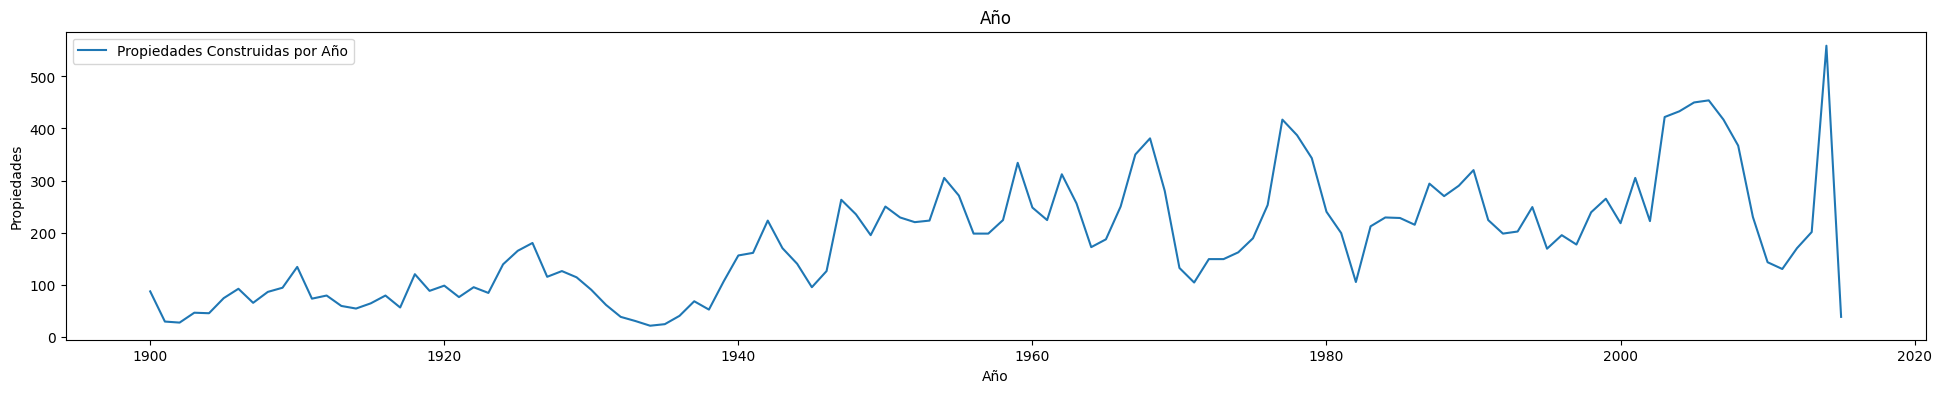

In [11]:
#Evolución de la construcción de propiedades a lo largo de los años.
num_propiedades = df3['yr_built'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(24, 4))
ax.plot(num_propiedades.index, num_propiedades.values, label='Propiedades Construidas por Año')
ax.set_xlabel('Año')
ax.set_ylabel('Propiedades')
ax.set_title('Año')
ax.legend()
plt.show()

# En general, la construccion de propiedades ha tenido un ligero aumento desde 1960 a los años 2000, manteniendo un promedio de 200 propiedades construídas al año, en comparación con el tramo de 1900 - 1920. Sin embargo, dicho aumento ha venido acompañado también de una volatilidad muy alta. 

Text(0, 0.5, 'Precio USD')

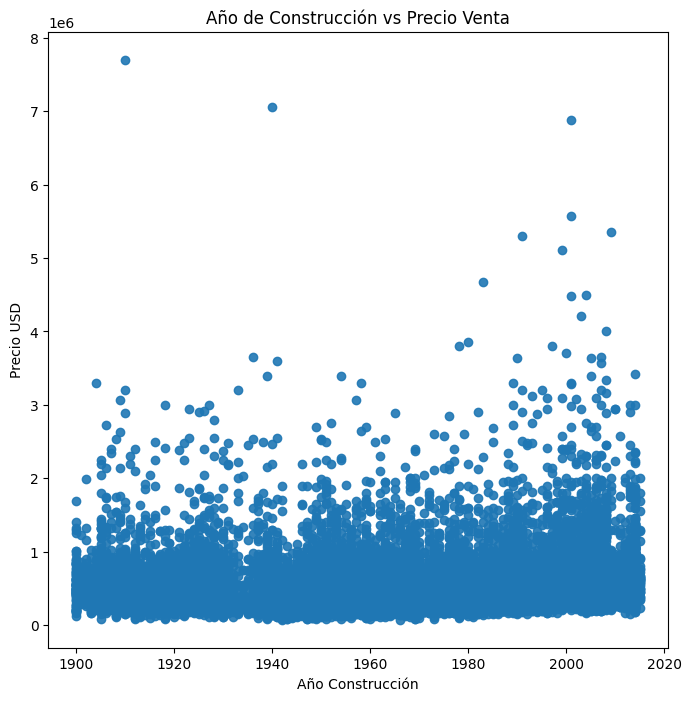

In [12]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(df3['yr_built'], df3['price'], alpha=0.9)
ax.set_title('Año de Construcción vs Precio Venta')
ax.set_xlabel('Año Construcción')
ax.set_ylabel('Precio USD')

# Sin considerar ciertas excepciones, el grafico de dispersión, nos podría indicar que no necesariamente las propiedades van perdiendo su valor a medida que van aumentando su edad, sino que hasta pueden ser competitivas en precio con propiedades bastante nuevas, lo que puede hablar bien del grado de restauración que tienen las propiedades más antiguas, las cuales se encuentran vigentes y son bien valoradas en la actualidad.

# Correlación entre Variables

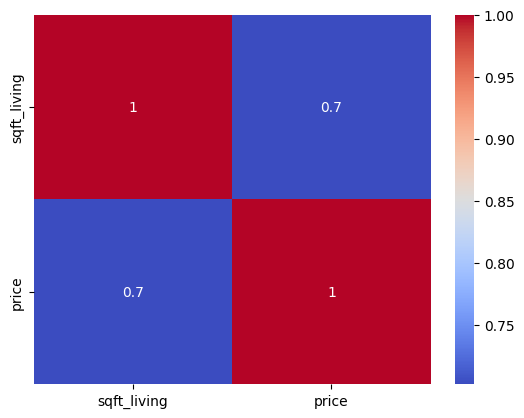

In [20]:
#https://seaborn.pydata.org/tutorial/color_palettes.html
# Matriz de Correlación pies_cuadrados vs precio.

columns = df3[['sqft_living', 'price']]
matriz_corr = columns.corr()
sns.heatmap(matriz_corr, cmap='coolwarm', annot=True)
plt.show()

# Como suponíamos, existe una correlación alta entre los pies cuadrados habitables de una propiedad y su precio de venta.

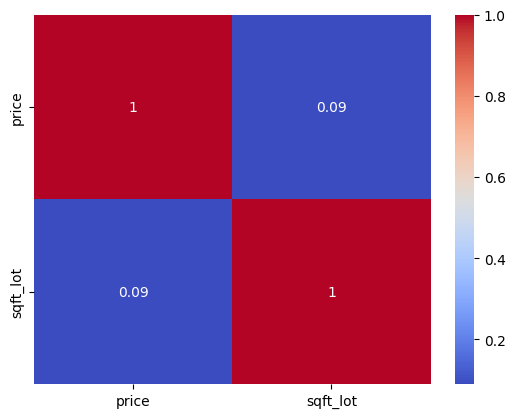

In [21]:
columns = df3[['price', 'sqft_lot']]
matriz_corr = columns.corr()
sns.heatmap(matriz_corr, cmap='coolwarm', annot=True)
plt.show()

# El tamaño del terreno NO incide en el precio de la propiedad.

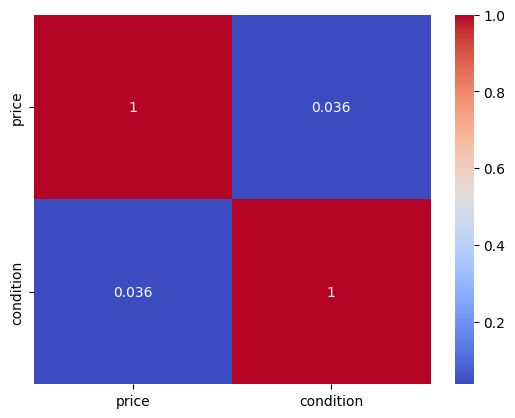

In [23]:
columns = df3[['price', 'condition']]
matriz_corr = columns.corr()
sns.heatmap(matriz_corr, cmap='coolwarm', annot=True)
plt.show()

# El estado de la propiedad NO incide en el precio de esta.

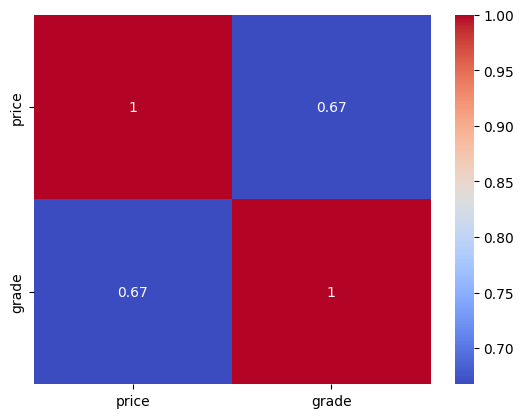

In [22]:
columns = df3[['price', 'grade']]
matriz_corr = columns.corr()
sns.heatmap(matriz_corr, cmap='coolwarm', annot=True)
plt.show()

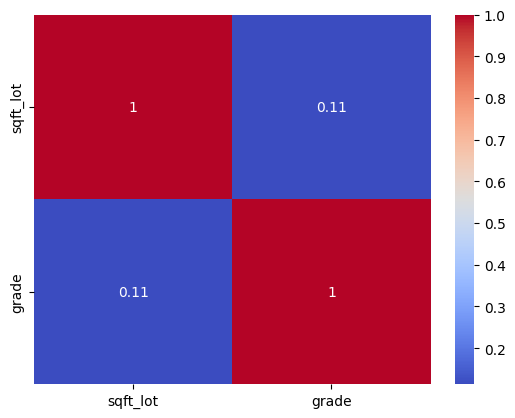

In [26]:
columns = df3[['sqft_lot', 'grade']]
matriz_corr = columns.corr()
sns.heatmap(matriz_corr, cmap='coolwarm', annot=True)
plt.show()

# La correlación entre la calificación y el precio no suele ser tan alta, sin embargo, de igual manera poddríamos utilizar dicha correlación para métodos de clasificación.

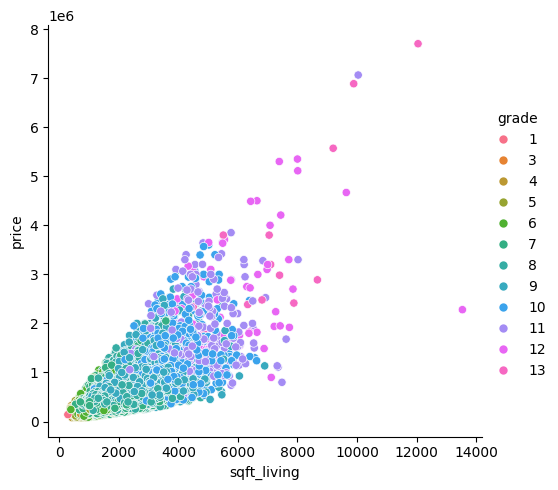

In [24]:
Scatter = sns.relplot(df3, x="sqft_living", y="price", hue="grade", kind="scatter")

Text(0, 0.5, 'precio_USD')

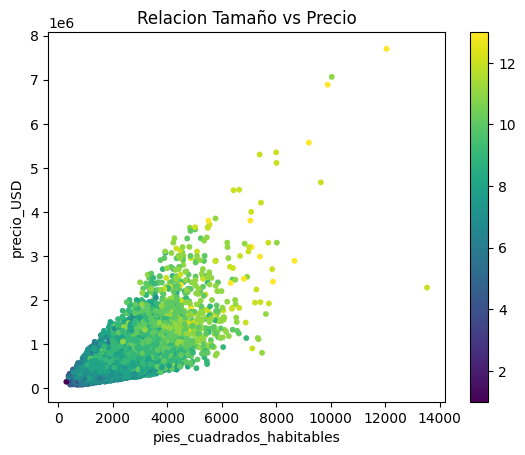

In [25]:
fig, ax = plt.subplots()
grafico = ax.scatter(df3['sqft_living'], df3['price'], c=df3.grade,s=10)
fig.colorbar(grafico)
ax.set_title('Relacion Tamaño vs Precio')
ax.set_xlabel('pies_cuadrados_habitables')
ax.set_ylabel('precio_USD')

# En gral, existe una correlacion directa entre el tamaño de una propiedad y su precio, lo cual puede verse reflejado también a través de la calificación de esta ('grade'), en donde en gral, propiedades mejor calificadas, deberían tener un precio mayor.

# Identificación y Tratamiento de Outliers (Valores Atípicos) - Variables Independientes.

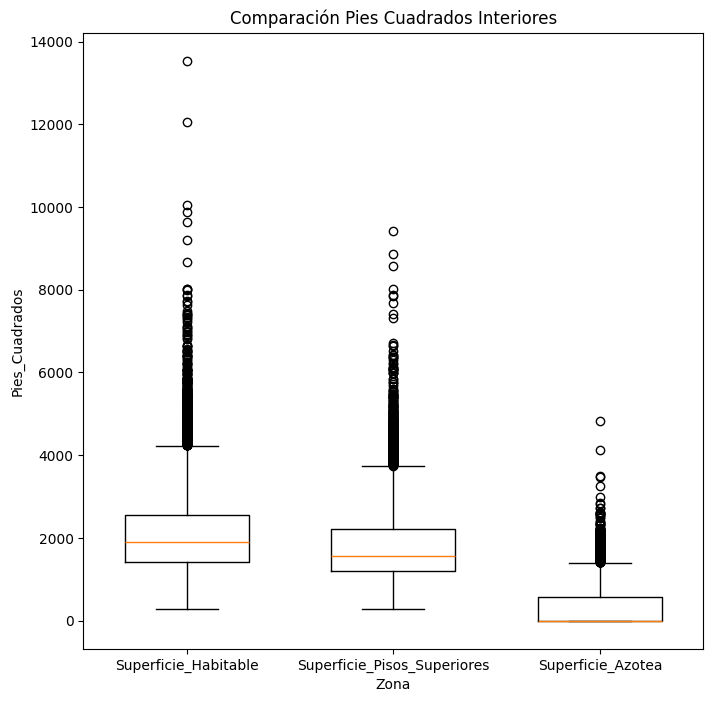

In [28]:
# Outliers (Valores Atípicos)
fig, ax = plt.subplots(figsize=(8, 8))
ax.boxplot(df3['sqft_living'], positions=[1], widths=0.6)
ax.boxplot(df3['sqft_above'], positions=[2], widths=0.6)
ax.boxplot(df3['sqft_basement'], positions=[3], widths=0.6)
ax.set_xticks([1,2,3])
ax.set_xticklabels(['Superficie_Habitable','Superficie_Pisos_Superiores','Superficie_Azotea'])
ax.set_title('Comparación Pies Cuadrados Interiores')
ax.set_xlabel('Zona')
ax.set_ylabel('Pies_Cuadrados')
ax.autoscale(axis='y')
plt.show()


In [34]:
df3[['sqft_living','sqft_above','sqft_basement','sqft_lot']].describe()

,sqft_living,sqft_above,sqft_basement,sqft_lot
count,21613.000000,21613.000000,21613.000000,2.161300e+04
mean,2079.899736,1788.390691,291.509045,1.510697e+04
std,918.440897,828.090978,442.575043,4.142051e+04
min,290.000000,290.000000,0.000000,5.200000e+02
25%,1427.000000,1190.000000,0.000000,5.040000e+03
50%,1910.000000,1560.000000,0.000000,7.618000e+03
75%,2550.000000,2210.000000,560.000000,1.068800e+04
max,13540.000000,9410.000000,4820.000000,1.651359e+06


# Considerando que 1 metro cuadrado = 10.76 pies cuadrados, los valores máximos y minimos de las siguientes variables en teoría no deberían ser consideros como outliers.

1. sqft_living: Max: 13,540 (1258 m2), Min: 290 (27 m2)
2. sqft_above: Max: 9,410 (874 m2), Min: 290 (27 m2)
3. sqft_basement: Max: 4,820 (448 m2), Min: 0 (sin azotea)
4. sqft_lot: Max: 1,650,000 (153,346 m2 = 16.33 Hectareas), Min: 520 (48 m2)

# Por lo tanto, no vale la pena descartarlos, sino tenerlos en consideración como variables desviadas a ser estudiadas en mayor profundidad.

In [35]:
df3[df3['sqft_lot']==1.651359e+06]

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,price_z,price_outliers
id,,,,,,,,,,,,,,,,,,,,,
1020069017,2015,4,1,1300,1651359,1,0,3,4,6,...,1920,0,98022,47.2313,-122.023,2560,425581,700000,0.435576,0


In [36]:
df3.sort_values('sqft_lot', ascending=False)

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,price_z,price_outliers
id,,,,,,,,,,,,,,,,,,,,,
1020069017,2015,4,1,1300,1651359,1,0,3,4,6,...,1920,0,98022,47.2313,-122.023,2560,425581,700000,0.435576,0
3326079016,2015,2,1,710,1164794,1,0,0,2,5,...,1915,0,98014,47.6888,-121.909,1680,16730,190000,-0.953588,0
2623069031,2014,5,3,3010,1074218,1,0,0,5,8,...,1931,0,98027,47.4564,-122.004,2450,68825,542500,0.006570,0
2323089009,2015,4,3,4030,1024068,2,0,0,3,10,...,2006,0,98045,47.4619,-121.744,1830,11700,855000,0.857773,0
722069232,2014,4,3,3770,982998,2,0,0,3,10,...,1992,0,98058,47.4140,-122.087,2290,37141,998000,1.247284,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7899800857,2014,2,2,1070,635,2,0,0,3,9,...,2008,0,98106,47.5212,-122.357,1070,928,256950,-0.771226,0
2559950110,2015,2,2,2470,609,3,0,0,3,11,...,2011,0,98112,47.6182,-122.312,2440,1229,1234570,1.891666,0
6371000026,2015,2,2,1030,600,2,0,0,3,8,...,2004,0,98116,47.5788,-122.410,1120,1267,367500,-0.470104,0


# El Valor Máximo de sqft_lot podría ser considerado como un Outlier, sin embargo, al revisar el data set, podemos ver que las propiedades con mayor terreno fueron construídas en 1920, 1925 y 1931, por lo tanto, estas pueden haber sido fincas con grandes terrenos asociados.

# Identificación de Outliers (Valores Atípicos) - Variable Dependiente (Objetivo).

In [15]:
# Variable Objetivo: Price
# Identificamos los valores atípicos del precio de acuerdo al modelo Z-Score (Estandarización). 

df3['price_z'] = (df3['price'] - df3['price'].mean())/df3['price'].std()
df3['price_outliers'] = 0
df3.loc[(df3['price_z']>3)|(df3['price_z']<-3) , 'price_outliers'] = 1
df3[['price', 'price_z','price_outliers']]

,price,price_z,price_outliers
id,,,
7129300520,221900,-0.866697,0
6414100192,538000,-0.005688,0
5631500400,180000,-0.980827,0
2487200875,604000,0.174086,0
1954400510,510000,-0.081956,0
...,...,...,...
263000018,360000,-0.490533,0
6600060120,400000,-0.381579,0
1523300141,402101,-0.375856,0


In [16]:
df3['price_outliers'].value_counts()

price_outliers
0    21207
1      406
Name: count, dtype: int64

In [17]:
print(df3.loc[df3['price_outliers']== 1, 'price'])

id
2524049179    2000000
7855801670    2250000
2025069065    2400000
7960900060    2900000
7424700045    2050000
               ...   
3262300818    1865000
8964800330    3000000
715010530     1881580
524059330     1700000
9253900271    3567000
Name: price, Length: 406, dtype: int64


In [18]:
print(df3.loc[df3['price_outliers'] == 1, 'price'].max())
print(df3.loc[df3['price_outliers'] == 1, 'price'].min())

7700000
1646000


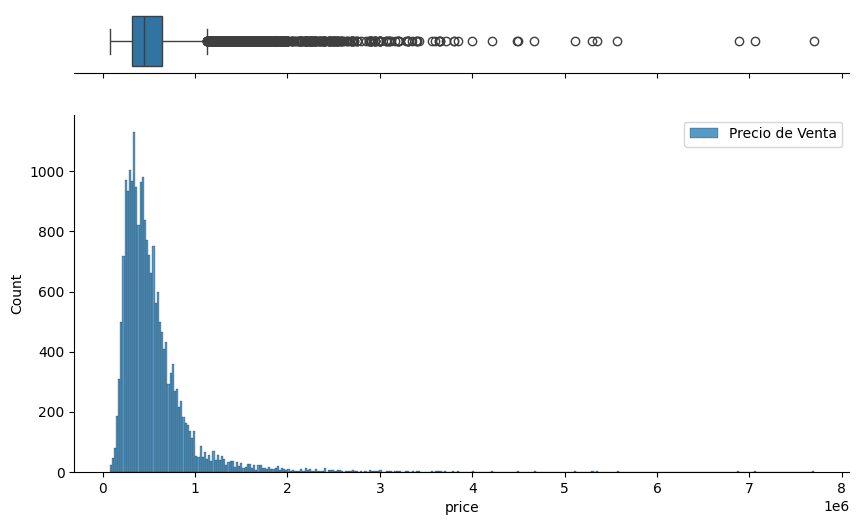

In [19]:
import warnings
warnings.filterwarnings("ignore")

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,6), gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df3['price'], ax=ax_box, orient="h") 
sns.histplot(df3['price'], ax=ax_hist, label='Precio de Venta')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()

# Si analizamos los valores máximos y mínimos de los outliers de precios, los cuales se encuentran todos sobre el 3er cuartil, no es tan descabellado pensar que el rango de precios de valores atípicos se encuentre entre los siguientes márgenes:

1. Máx: $ USD 7,700,000 (Siete Millones, Setecientos Mil Dólares)
2. Mín: $ USD 1,646,000 (Un Millon, Seisciencitos Cuarenta y Seis Mil Dólares)

# Sin embargo, de igual manera utilizaremos herramientas de tratamiento de Outliers, en función Agrupación de Atributos y Diccionarios.

# Metodos de Clasificación y Agrupamiento para Variables Independientes.

In [38]:
# Estandarización Previo a la Regla del Codo.

from sklearn.preprocessing import StandardScaler

# Convertir a DataFrame para facilitar el manejo
df4 = df3[['sqft_living', 'sqft_lot']].copy()

# Estandarización de los Datos (los datos deben ser estandarizados ya que al tener las variables de entrada de diferente naturaleza, puede generar ruido en la segmentación.)
scaler = StandardScaler()
df4[['sqft_living', 'sqft_lot']] = scaler.fit_transform(df4[['sqft_living', 'sqft_lot']])
df4

,sqft_living,sqft_lot
id,,
7129300520,-0.979835,-0.228321
6414100192,0.533634,-0.189885
5631500400,-1.426254,-0.123298
2487200875,-0.130550,-0.244014
1954400510,-0.435422,-0.169653
...,...,...
263000018,-0.598746,-0.337424
6600060120,0.250539,-0.224386
1523300141,-1.154047,-0.332137


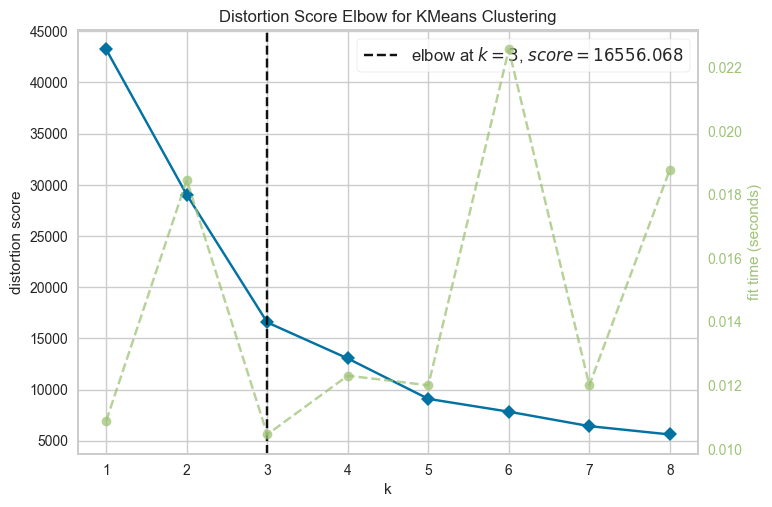

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [64]:
# https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

#Regla de Codo

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,9))
visualizer.fit(df4) 
visualizer.show()   

# Busca representar que tanto se parecen los individuos de un cluster al valor central de este, de esta manera, mientras más similares sean los inidividuos a un cluster, más distantes se encontrarán los clusters que se formen (formación de grupos bien delimitados en donde la distancia entre ellos sea la menor posible).

# Se utiliza la suma de los cuadrados dentro de cada grupo.

# Su busca un punto en el cual, el valor de la suma de los mínimos cuadrados deje de disminuir de manera drástica 3 (Cantidad Óptima de Clusters a Formar).

# También ajustamos el rango de k, para obtener el mejor score bajo un mismo k.

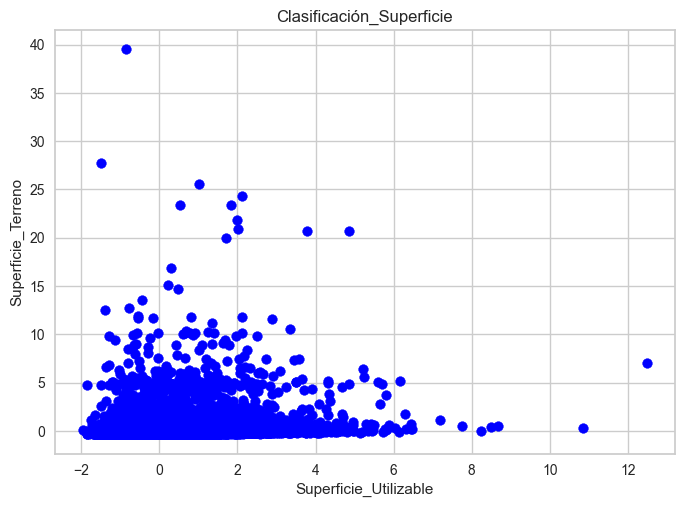

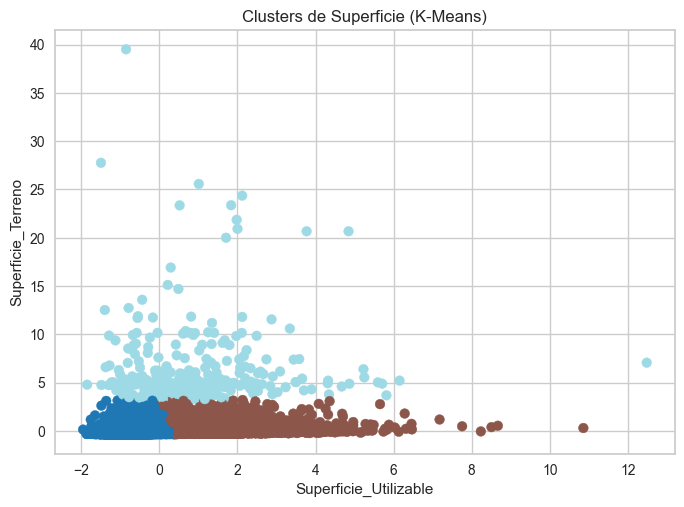

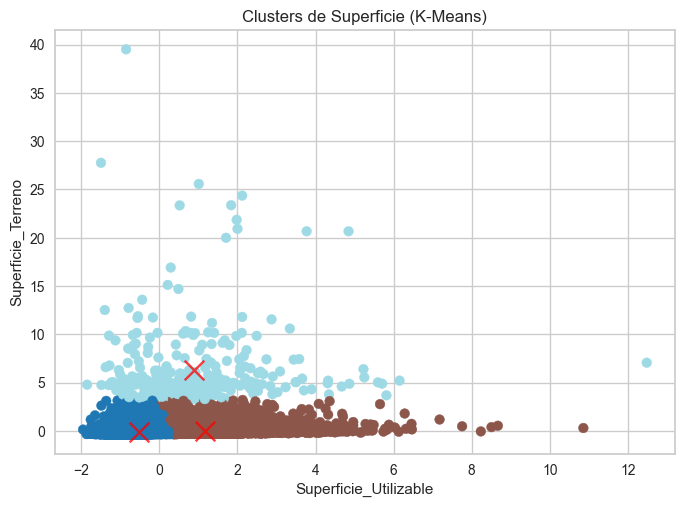

In [65]:
# Utilizamos el método de Clasificación de K-Means para Clasificar las Propiedades de Acuerdo a los Metros Cuadrados Efectivos (Utilizables) y los Metros cuadrados totales del Terreno.

# Visualización de los datos originales
plt.scatter(df4['sqft_living'], df4['sqft_lot'], c='blue', marker='o')
plt.title('Clasificación_Superficie')
plt.xlabel('Superficie_Utilizable')
plt.ylabel('Superficie_Terreno')
plt.show()

# Aplicar K-Means
kmeans = KMeans(n_clusters=3, random_state=0)
df4['cluster_superficie'] = kmeans.fit_predict(df4)

# Visualización de los Clusters
plt.scatter(df4['sqft_living'], df4['sqft_lot'], c=df4['cluster_superficie'], cmap='tab20', marker='o')
plt.title('Clusters de Superficie (K-Means)')
plt.xlabel('Superficie_Utilizable')
plt.ylabel('Superficie_Terreno')
plt.show()

# Centros de los Clusters
centers = kmeans.cluster_centers_
plt.scatter(df4['sqft_living'], df4['sqft_lot'], c=df4['cluster_superficie'], cmap='tab20', marker='o')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='x')
plt.title('Clusters de Superficie (K-Means)')
plt.xlabel('Superficie_Utilizable')
plt.ylabel('Superficie_Terreno')
plt.show()

# Para el caso de los vecindarios no creo sea razonable estandarizar, ya que ambas variables Latitud y longitud son de igual naturaleza y se miden bajo la misma unidad de medida.

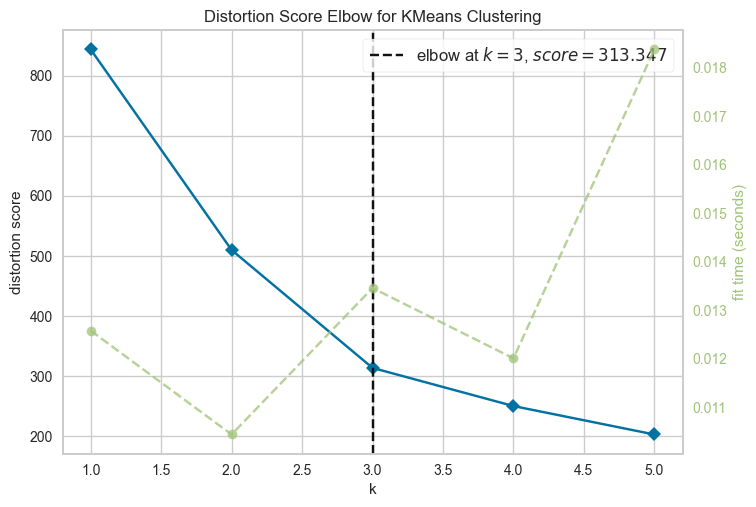

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [73]:
# Convertir a DataFrame para facilitar el manejo
df5 = df3[['lat', 'long']].copy()

#Regla de Codo

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,6))
visualizer.fit(df5) 
visualizer.show()  

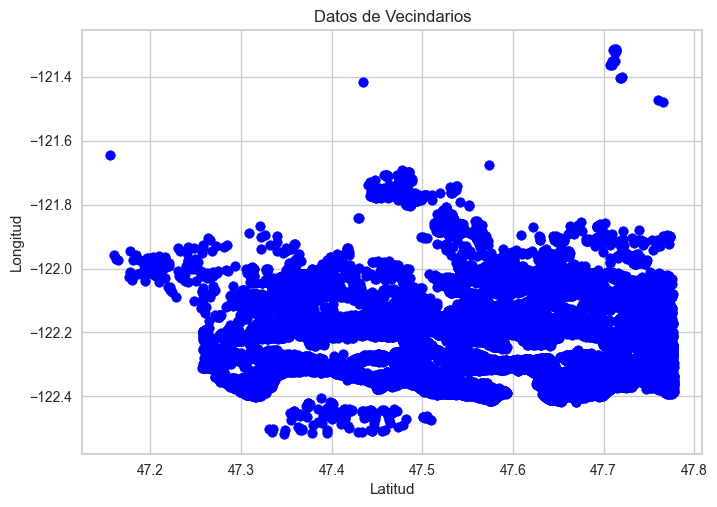

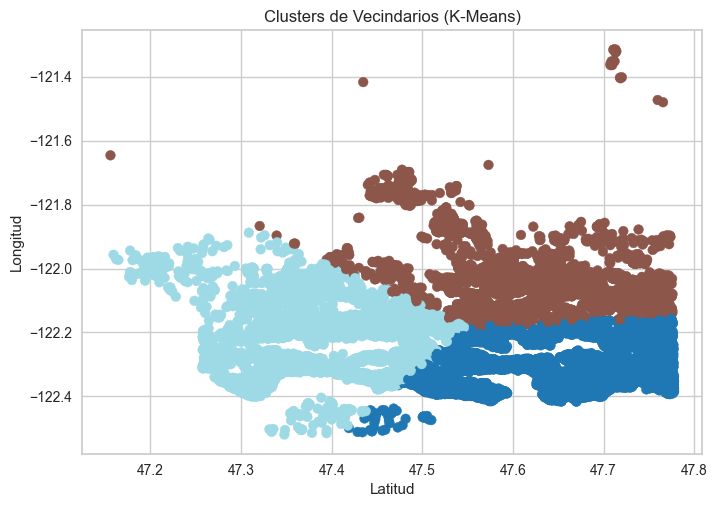

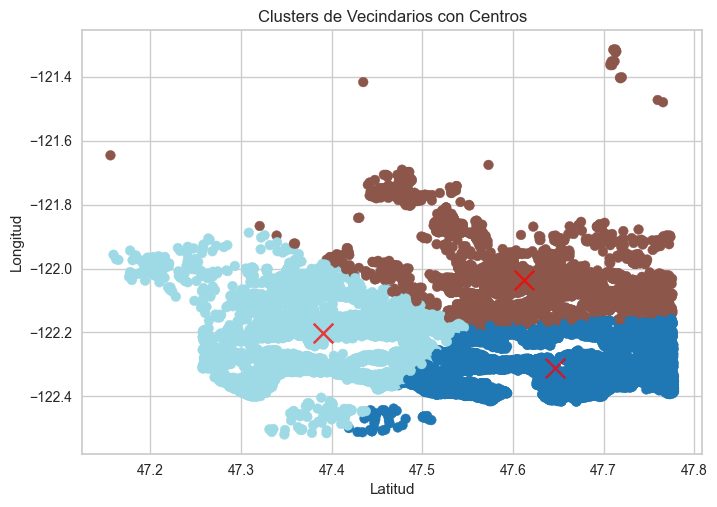

In [75]:
# Utilizamos el método de Clasificación de K-Means para identificar los Vecindarios.

# Visualización de los datos originales
plt.scatter(df5['lat'], df5['long'], c='blue', marker='o')
plt.title('Datos de Vecindarios')
plt.xlabel('Latitud')
plt.ylabel('Longitud')
plt.show()

# Aplicar K-Means
kmeans = KMeans(n_clusters=3, random_state=0)
df5['cluster_vecindario'] = kmeans.fit_predict(df5)

# Visualización de los Clusters
plt.scatter(df5['lat'], df5['long'], c=df5['cluster_vecindario'], cmap='tab20', marker='o')
plt.title('Clusters de Vecindarios (K-Means)')
plt.xlabel('Latitud')
plt.ylabel('Longitud')
plt.show()

# Centros de los Clusters
centers = kmeans.cluster_centers_
plt.scatter(df5['lat'], df5['long'], c=df5['cluster_vecindario'], cmap='tab20', marker='o')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='x')
plt.title('Clusters de Vecindarios con Centros')
plt.xlabel('Latitud')
plt.ylabel('Longitud')
plt.show()

In [76]:
# Asociamos la clasificación del vecindario al Data Frame Inicial. 
df3['cluster_superficie'] = df4['cluster_superficie']
df3['cluster_vecindario'] = df5['cluster_vecindario']
df3

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,price,price_z,price_outliers,cluster_superficie,cluster_vecindario
id,,,,,,,,,,,,,,,,,,,,,
7129300520,2014,3,1,1180,5650,1,0,0,3,7,...,98178,47.5112,-122.257,1340,5650,221900,-0.866697,0,0,2
6414100192,2014,3,2,2570,7242,2,0,0,3,7,...,98125,47.7210,-122.319,1690,7639,538000,-0.005688,0,1,0
5631500400,2015,2,1,770,10000,1,0,0,3,6,...,98028,47.7379,-122.233,2720,8062,180000,-0.980827,0,0,0
2487200875,2014,4,3,1960,5000,1,0,0,5,7,...,98136,47.5208,-122.393,1360,5000,604000,0.174086,0,0,0
1954400510,2015,3,2,1680,8080,1,0,0,3,8,...,98074,47.6168,-122.045,1800,7503,510000,-0.081956,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,2014,3,2,1530,1131,3,0,0,3,8,...,98103,47.6993,-122.346,1530,1509,360000,-0.490533,0,0,0
6600060120,2015,4,2,2310,5813,2,0,0,3,8,...,98146,47.5107,-122.362,1830,7200,400000,-0.381579,0,0,0
1523300141,2014,2,0,1020,1350,2,0,0,3,7,...,98144,47.5944,-122.299,1020,2007,402101,-0.375856,0,0,0


In [77]:
# Creamos un diccionario con la agrupación de 'grade' (nivel de construcción y diseño), 'cluster_superficie' y 'cluster_vecindario'
mapping_dict = df3.set_index(['grade','cluster_superficie','cluster_vecindario'])['price'].to_dict()
mapping_dict

{(7, 0, 2): 270000,
 (7, 1, 0): 365000,
 (6, 0, 0): 245000,
 (7, 0, 0): 325000,
 (8, 0, 1): 400000,
 (11, 1, 1): 1222500,
 (8, 1, 1): 776000,
 (7, 0, 1): 336750,
 (9, 1, 0): 1007500,
 (8, 0, 2): 388000,
 (8, 1, 2): 350000,
 (6, 0, 2): 224000,
 (8, 1, 0): 670000,
 (8, 0, 0): 400000,
 (5, 0, 1): 210000,
 (9, 1, 1): 810000,
 (9, 0, 1): 663000,
 (9, 1, 2): 610685,
 (10, 1, 0): 1575000,
 (10, 1, 1): 3567000,
 (10, 1, 2): 1088000,
 (9, 0, 0): 645000,
 (7, 1, 2): 300000,
 (9, 2, 1): 800000,
 (7, 1, 1): 332220,
 (12, 1, 1): 2238890,
 (5, 0, 2): 249000,
 (7, 2, 2): 420000,
 (6, 0, 1): 282000,
 (10, 2, 1): 950000,
 (10, 0, 1): 654000,
 (5, 0, 0): 375000,
 (11, 1, 0): 1537000,
 (9, 0, 2): 465000,
 (4, 0, 1): 130000,
 (6, 2, 0): 270000,
 (7, 2, 1): 580000,
 (12, 2, 1): 1488000,
 (6, 2, 1): 200000,
 (10, 2, 2): 780000,
 (11, 2, 1): 1057000,
 (12, 1, 2): 1637500,
 (8, 2, 2): 565000,
 (8, 2, 1): 659000,
 (11, 1, 2): 1025000,
 (4, 0, 2): 230000,
 (3, 0, 2): 262000,
 (12, 1, 0): 2998000,
 (10, 0, 0): 7

In [79]:
# Valores promedio por agrupación:
# Existen valores Nulos, en los cuales no hay un valor representativo en la intersección entre 'grade', 'cluster_superficie', 'cluster_vecindario'
average_price_dict = df3.groupby(['grade','cluster_superficie','cluster_vecindario'])['price'].mean().to_dict()
average_price_dict

{(1, 0, 0): nan,
 (1, 0, 1): 142000.0,
 (1, 0, 2): nan,
 (1, 1, 0): nan,
 (1, 1, 1): nan,
 (1, 1, 2): nan,
 (1, 2, 0): nan,
 (1, 2, 1): nan,
 (1, 2, 2): nan,
 (3, 0, 0): nan,
 (3, 0, 1): 280000.0,
 (3, 0, 2): 168500.0,
 (3, 1, 0): nan,
 (3, 1, 1): nan,
 (3, 1, 2): nan,
 (3, 2, 0): nan,
 (3, 2, 1): nan,
 (3, 2, 2): nan,
 (4, 0, 0): 223881.25,
 (4, 0, 1): 228125.0,
 (4, 0, 2): 194666.66666666666,
 (4, 1, 0): nan,
 (4, 1, 1): nan,
 (4, 1, 2): nan,
 (4, 2, 0): nan,
 (4, 2, 1): nan,
 (4, 2, 2): 265000.0,
 (5, 0, 0): 280417.58974358975,
 (5, 0, 1): 298330.0,
 (5, 0, 2): 215330.3046875,
 (5, 1, 0): nan,
 (5, 1, 1): nan,
 (5, 1, 2): nan,
 (5, 2, 0): nan,
 (5, 2, 1): 268750.0,
 (5, 2, 2): 341525.0,
 (6, 0, 0): 343700.05903083703,
 (6, 0, 1): 343254.5833333333,
 (6, 0, 2): 225594.4112021858,
 (6, 1, 0): 455950.0,
 (6, 1, 1): 364250.0,
 (6, 1, 2): 348992.85714285716,
 (6, 2, 0): 270000.0,
 (6, 2, 1): 347375.0,
 (6, 2, 2): 362544.54545454547,
 (7, 0, 0): 460567.5269388741,
 (7, 0, 1): 425752.14439

In [80]:
# Utilizamos una función para reemplazar los valores promedios de las categorías, siempre y cuando el valor del precio sea un Outlier.
def replace_price_with_average(row, average_price_dict):
    if row['price_outliers'] == 1:
        return average_price_dict.get((row['grade'], row['cluster_superficie'], row['cluster_vecindario']), row['price'])
    return row['price']

# Reemplazamos el Precio por el Promedio.
df3['price'] = df3.apply(replace_price_with_average, axis=1, args=(average_price_dict,))

df3_price_updated = df3[df3['price_outliers'] == 1]

In [82]:
df3_price_updated.groupby(['cluster_vecindario','cluster_superficie','grade'])['price'].describe()


count          mean  \
cluster_vecindario cluster_superficie grade                        
0                  0                  9        1.0  7.587168e+05   
                   1                  9       59.0  1.044007e+06   
                                      7        1.0  6.180978e+05   
                                      8       15.0  7.837488e+05   
                                      10     121.0  1.453507e+06   
                                      11      93.0  2.006063e+06   
                                      12      30.0  3.096850e+06   
                                      13      10.0  4.112200e+06   
1                  1                  9        2.0  7.691284e+05   
                                      7        1.0  5.518940e+05   
                                      8        2.0  6.512810e+05   
                                      10      13.0  9.172925e+05   
                                      11      14.0  1.210941e+06   
                                      12      19.0  1.639351e+06   
                                      13       3.0  2.367667e+06   
                   2                  10       2.0  9.571214e+05   
                                      11       6.0  1.417281e+06   
                                      12       6.0  1.865750e+06   
2                  1                  9        1.0  5.178258e+05   
                                      8        1.0  4.345607e+05   
                                      10       1.0  6.496858e+05   
                                      11       3.0  1.047358e+06   
                                      12       2.0  1.591300e+06   

                                                      std           min  \
cluster_vecindario cluster_superficie grade                               
0                  0                  9               NaN  7.587168e+05   
                   1                  9      0.000000e+00  1.044007e+06   
                                      7               NaN  6.180978e+05   
                                      8      2.410026e-10  7.837488e+05   
                                      10     2.337988e-10  1.453507e+06   
                                      11     0.000000e+00  2.006063e+06   
                                      12     0.000000e+00  3.096850e+06   
                                      13     0.000000e+00  4.112200e+06   
1                  1                  9      0.000000e+00  7.691284e+05   
                                      7               NaN  5.518940e+05   
                                      8      0.000000e+00  6.512810e+05   
                                      10     1.211689e-10  9.172925e+05   
                                      11     0.000000e+00  1.210941e+06   
                                      12     2.392107e-10  1.639351e+06   
                                      13     0.000000e+00  2.367667e+06   
                   2                  10     0.000000e+00  9.571214e+05   
                                      11     0.000000e+00  1.417281e+06   
                                      12     0.000000e+00  1.865750e+06   
2                  1                  9               NaN  5.178258e+05   
                                      8               NaN  4.345607e+05   
                                      10              NaN  6.496858e+05   
                                      11     0.000000e+00  1.047358e+06   
                                      12     0.000000e+00  1.591300e+06   

                                                      25%           50%  \
cluster_vecindario cluster_superficie grade                               
0                  0                  9      7.587168e+05  7.587168e+05   
                   1                  9      1.044007e+06  1.044007e+06   
                                      7      6.180978e+05  6.180978e+05   
                                      8      7.837488e+05  7.837488e+05   
                  

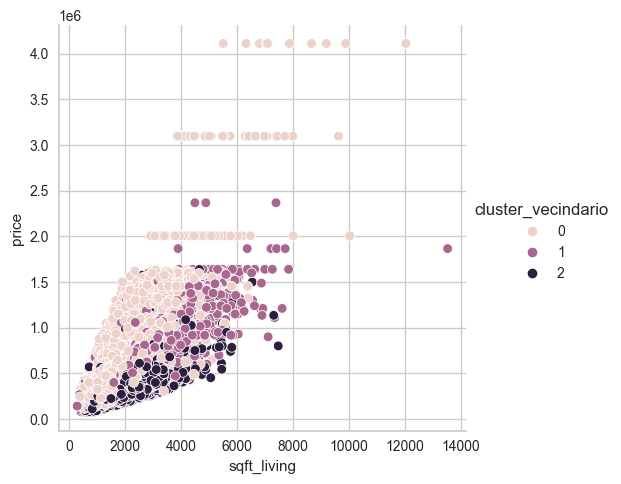

In [83]:
Scatter = sns.relplot(df3, x="sqft_living", y="price", hue="cluster_vecindario", kind="scatter")

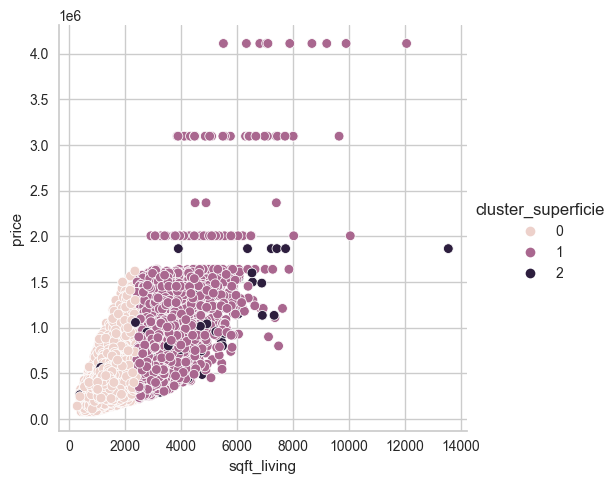

In [84]:
Scatter_1 = sns.relplot(df3, x="sqft_living", y="price", hue="cluster_superficie", kind="scatter")

<Axes: xlabel='grade', ylabel='Count'>

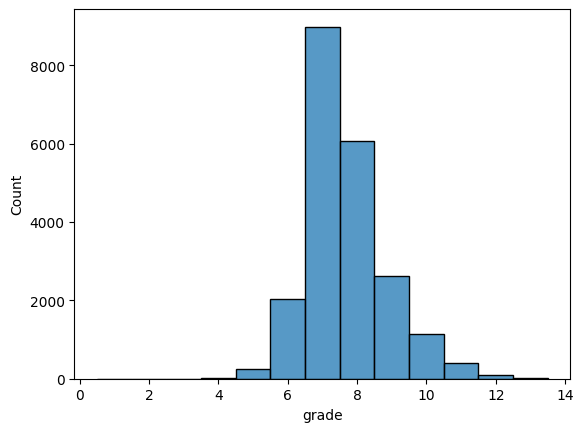

In [41]:
# Histograma
sns.histplot(df3, x="grade")

# Generalmente las propiedades con calificaciones más altas, suelten ser menos, ya que se requiere cumplir con un mayor número de parámetros de construcción y diseño.

# Análisis Variables Categóricas.

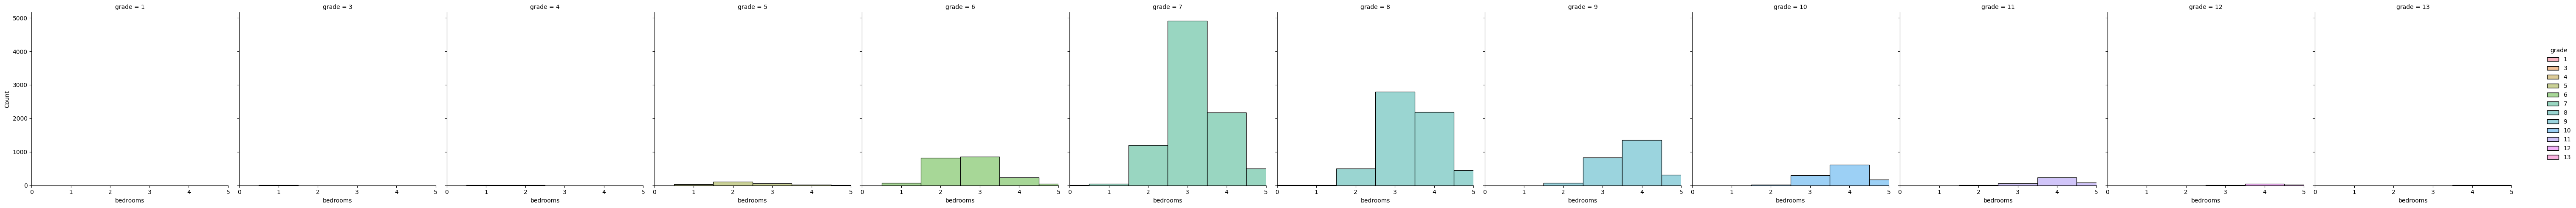

In [42]:
# Histograma por Categoria (Figure-level) - Habitaciones.

bin_width = 1
bin_range = range(0, 5, bin_width)
grafico_1 = sns.displot(df3, x="bedrooms", hue="grade", col="grade", bins=bin_range)
grafico_1.set(xlim=(0,5))


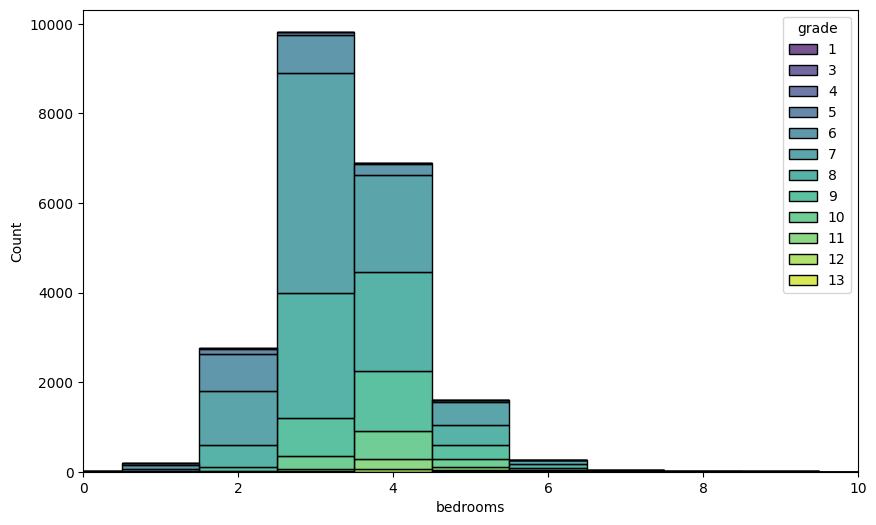

In [43]:
# Histograma Apilado por Catergoria - Habitaciones.
plt.figure(figsize=(10, 6))
sns.histplot(df3, x="bedrooms", hue="grade", multiple="stack", palette='viridis')
plt.xlim(0,10)
plt.show()

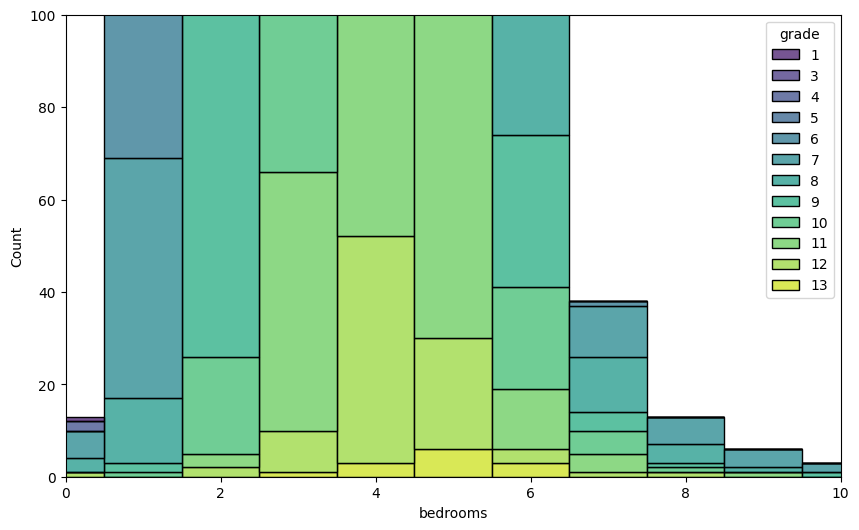

In [44]:
# Histograma Apilado por Catergoria - Habitaciones.
plt.figure(figsize=(10, 6))
sns.histplot(df3, x="bedrooms", hue="grade", multiple="stack", palette='viridis')
plt.xlim(0,10)
plt.ylim(0,100)
plt.show()

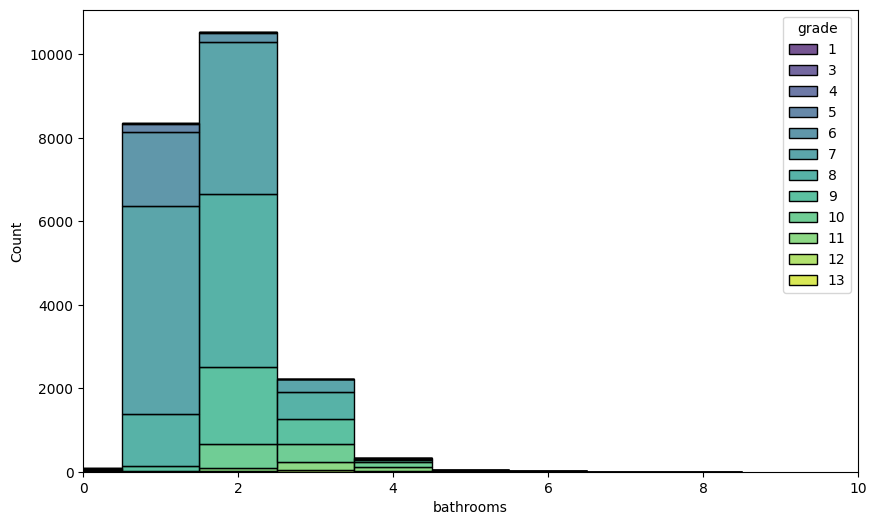

In [45]:
# Histograma Apilado por Catergoria - Baños.
plt.figure(figsize=(10, 6))
sns.histplot(df3, x="bathrooms", hue="grade", multiple="stack", palette='viridis')
plt.xlim(0,10)
plt.show()

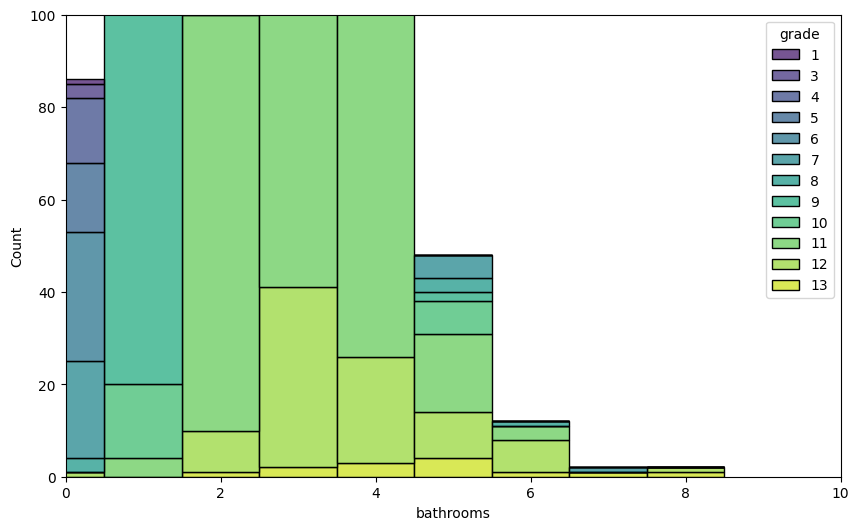

In [46]:
# Histograma Apilado por Catergoria - Baños.
plt.figure(figsize=(10, 6))
sns.histplot(df3, x="bathrooms", hue="grade", multiple="stack", palette='viridis')
plt.xlim(0,10)
plt.ylim(0,100)
plt.show()

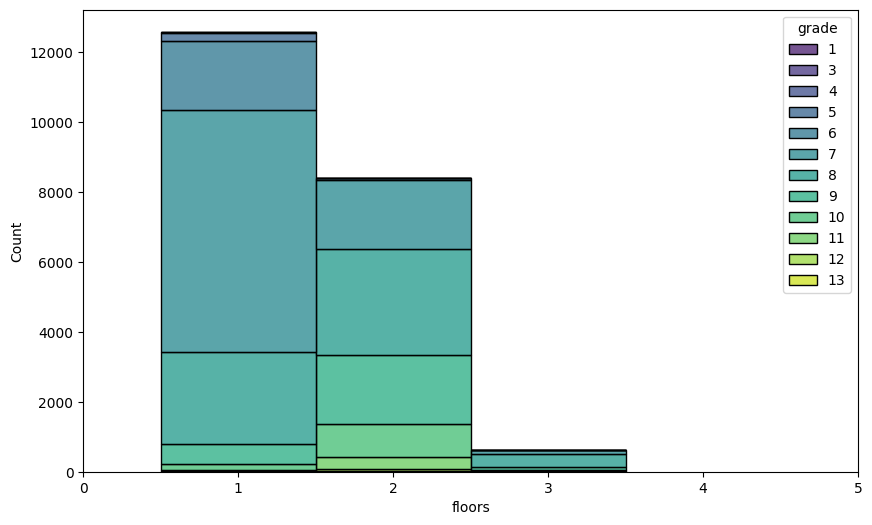

In [47]:
# Histograma Apilado por Catergoria - Pisos.
plt.figure(figsize=(10, 6))
sns.histplot(df3, x="floors", hue="grade", multiple="stack", palette='viridis')
plt.xlim(0,5)
plt.show()

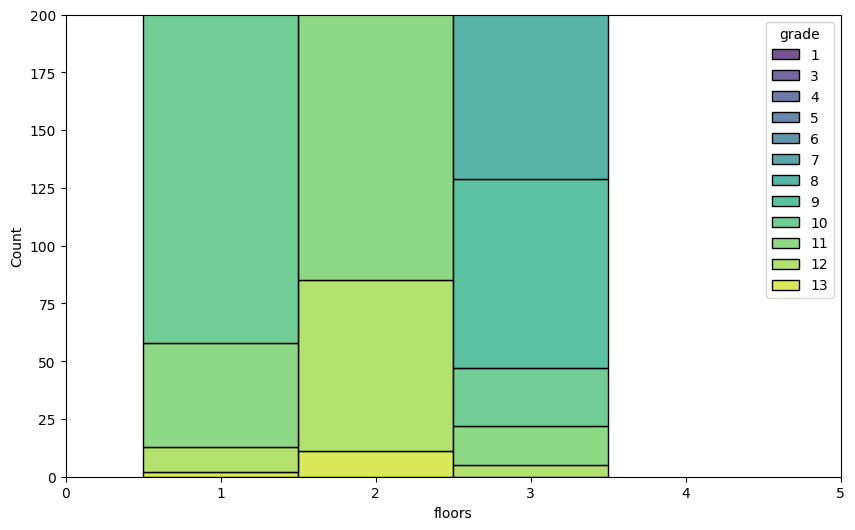

In [48]:
# Histograma Apilado por Catergoria - Pisos.
plt.figure(figsize=(10, 6))
sns.histplot(df3, x="floors", hue="grade", multiple="stack", palette='viridis')
plt.xlim(0,5)
plt.ylim(0,200)
plt.show()

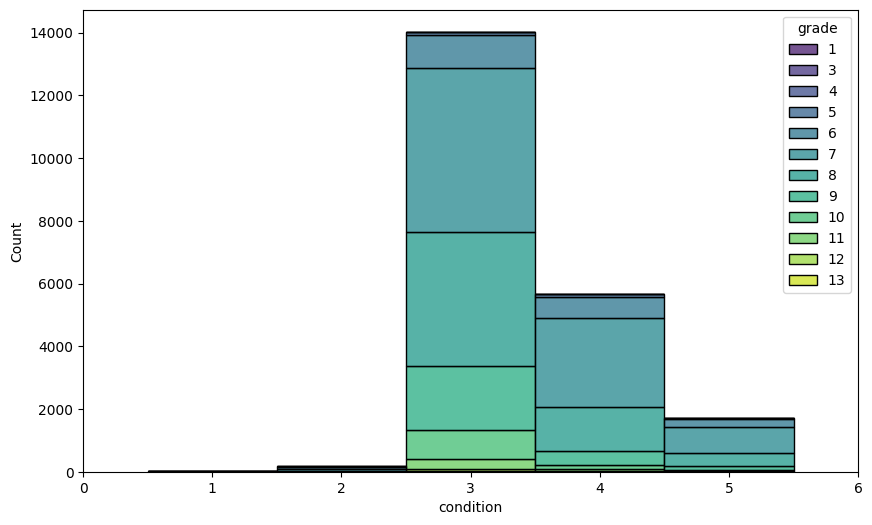

In [49]:
# Histograma Apilado por Catergoria - Estado de la Propiedad.
plt.figure(figsize=(10, 6))
sns.histplot(df3, x="condition", hue="grade", multiple="stack", palette='viridis')
plt.xlim(0,6)
plt.show()

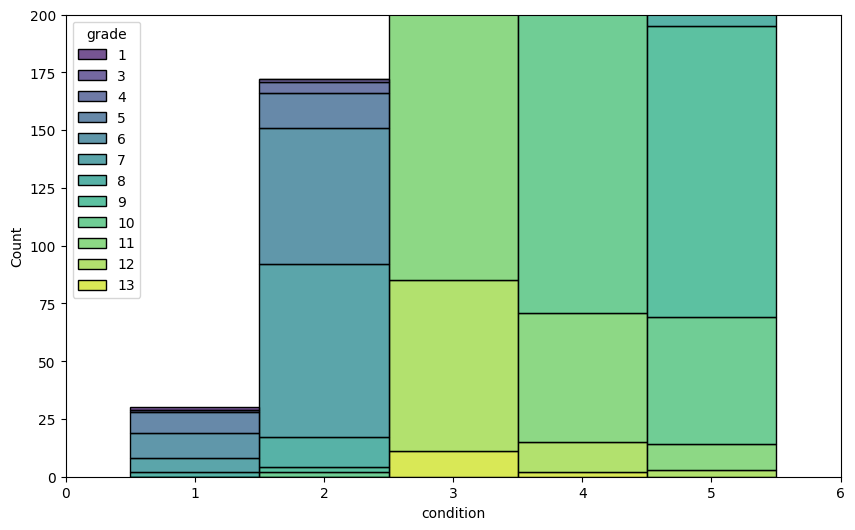

In [50]:
# Histograma Apilado por Catergoria - Estado de la Propiedad.
plt.figure(figsize=(10, 6))
sns.histplot(df3, x="condition", hue="grade", multiple="stack", palette='viridis')
plt.xlim(0,6)
plt.ylim(0,200)
plt.show()

# En general, la variable 'grade' (calificación de la propiedad), asociada al nivel de construcción y diseño (1-13), no tiene relacion directa con el número de habitaciones de la casa, sin embargo, esta variable si presenta una tendencia más ajustada al momento de compararla con el número de baños de la casa, donde la categoría aumenta a media que aumentan los baños. Por otro lado, los pisos, al ser una variable categórica de 3 categorías únicamente, no entrega información concluyente con respecto a la relación de calificación de la propiedad, mientras que el estado de la propiedad, si influye de manera significativa en la calificación que se tiene de esta.

# Respuestas y Recomendaciones en base a los Insights.

Q.1 ¿Cuáles son las variables independientes que influyen más significativamente en las variaciones de la variable dependiente (objetivo)?

A.1 De acuerdo a los análisis realizados principalmente a través de gráficos de dispersión y correlación, las variables que impactan en mayor medida al precio de una propiedad, son los pies cuadrados habitables y calificación de dicha propiedad, con tasas de correlación de un 70% y un 67% respectivamente.

Q.2. ¿Qué variables poseen valores atípicos que podrían ser fácilmente reemplazados y/o eliminados, sin embargo, el contexto del problema no nos permite tratarlas, sino que considerarlas como caso de estudio?

A.2 Al analizar las variables inmobiliarias de espacio disponible ('sqft_living', 'sqft_above', 'sqft_basement') y la variable 'price', a través de gráficos de Box-Plot, Histográmas y el Método Z-Score, si bien se identificaron outliers o valores atípicos bastante alejados de los cuartiles principales, considerando el contexto del problema, se llegó a la conclsuión que dichos valores son perfectamente factibles dentro de la realidad y por la misma razón, si el contexto no hubiera sido considerado, estos valores hubieran sido fácilmente tratados, perdiendo la representatividad de la muestra de los datos y por consiguiente, generando posteriormente análisis y modelos sesgados.  

Q.3. Cuales variables NO fueron consideradas en este estudio, sin embargo, podrían tener un impacto significativo en las predicciones si se evalúan de la manera correcta?

A.3 Las variables de latitud y longitud no fueron tratadas en este estudio, debido a que de momento no se manejan herramientas para visualizar georeferecialmente un punto en un plano de dos dimensiones, incluyendo características geográficas. Sin embargo, creo que estas variables si las trabajamos de manera correcta, podrían tener un impacto significativo en la variable objetivo, ya que podríamos generar diferentes estrategias de clustering de acuerdo a barrios y o vecindarios en los cuales se encuentran las propiedades, valorando el precio de estas en función del fácil acceso a diferentes comodidades como transporte, educación, supermercados, hospitales, etc.